In [1]:
# Sample API
import mae6225
mae6225.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

Re   = 100.0
dt   = 0.01
tmax = 10.

# Define cell-centered variable names
center_vars = ['pres', 'divp', 'divc','asol','eror']
face_vars   = ['velc', 'hvar','asol','eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 1.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}


# Create the grid and data
gridc = mae6225.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = mae6225.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = mae6225.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

In [3]:
t  = 0.0
nt = 0

ins_stats = dict()

rk3_coeff = [[0,1/3,1/3],[-5/9,15/16,5/12],[-153/128,8/15,1/4]]

while t <= tmax:
    
    # RK3 loop
    for hconst, tconst1, tconst2 in rk3_coeff:
        
        # Calculate predicted velocity: u* = dt*H(u^n)
        mae6225.ins.predictor_rk3(gridx, gridy, 'velc', 'hvar', Re, dt*tconst1, hconst)
        # Calculate RHS for the pressure Poission solver div(u)/dt
        mae6225.ins.divergence(gridc, gridx, gridy, 'velc', 'divp', ifac=tconst2*dt)
        # Solve the pressure Poisson equation 
        ins_stats['ites'], ins_stats['res'] = mae6225.poisson.solve_jacobi(gridc, 'pres', 'divp',
                                                                           maxiter=10000, tol=1e-9)
        # Calculate corrected velocity u^n+1 = u* - dt * grad(P) 
        mae6225.ins.corrector(gridc, gridx, gridy, 'velc', 'pres', tconst2*dt)

    # Calculate divergence of the corrected velocity to display stats
    mae6225.ins.divergence(gridc, gridx, gridy, 'velc', 'divc')
    
    # Calculate stats
    ins_stats.update(mae6225.ins.stats(gridc, gridx, gridy, 'velc', 'pres', 'divc'))
    
    # Display stats
    if nt % 10 == 0:
        mae6225.io.display_stats(t, ins_stats)   
    
    t += dt
    nt += 1
    

------------ Time = 0.0 ---------------
Number of poisson iterations    : 9063
Final poisson residual : 9.996929145144993e-10
Max, Min, U   : 2.0, -0.0297246935904388
Max, Min, V   : 0.08293207278674751, -0.08293207278674751
Max, Min, P   : 1.4795268238512747, -1.3782402159201734
Max, Min, DIV : 2.205844751301811e-08, -2.2058374085642818e-08


------------ Time = 0.09999999999999999 ---------------
Number of poisson iterations    : 4113
Final poisson residual : 9.998450312392998e-10
Max, Min, U   : 2.0, -0.12291380305346064
Max, Min, V   : 0.2947592842388567, -0.3025334631207918
Max, Min, P   : 1.2116342252932166, -0.8619597514811591
Max, Min, DIV : 2.2337974293212826e-08, -2.2487801842885347e-08


------------ Time = 0.20000000000000004 ---------------
Number of poisson iterations    : 2842
Final poisson residual : 9.989715570879345e-10
Max, Min, U   : 2.0, -0.13850434861837777
Max, Min, V   : 0.32496091093134316, -0.3754357292948013
Max, Min, P   : 1.2256497421315076, -0.775084360716

------------ Time = 2.299999999999995 ---------------
Number of poisson iterations    : 391
Final poisson residual : 9.999230215669568e-10
Max, Min, U   : 2.0, -0.1725247990215745
Max, Min, V   : 0.3402497250035741, -0.4760976582627771
Max, Min, P   : 1.3760755392492638, -0.6958271262483761
Max, Min, DIV : 2.5067617313075802e-08, -2.1419220452845167e-08


------------ Time = 2.399999999999993 ---------------
Number of poisson iterations    : 394
Final poisson residual : 9.985312480440624e-10
Max, Min, U   : 2.0, -0.1715419080473344
Max, Min, V   : 0.340242356600917, -0.47620941634020497
Max, Min, P   : 1.3767380936452682, -0.6958464590788411
Max, Min, DIV : 2.3408823739221735e-08, -2.1191191634795103e-08


------------ Time = 2.4999999999999907 ---------------
Number of poisson iterations    : 396
Final poisson residual : 9.998867362607405e-10
Max, Min, U   : 2.0, -0.1705675620644475
Max, Min, V   : 0.34023609620572404, -0.47629282847015714
Max, Min, P   : 1.3772967105782397, -0.695868

------------ Time = 4.599999999999946 ---------------
Number of poisson iterations    : 214
Final poisson residual : 9.993928523258624e-10
Max, Min, U   : 2.0, -0.16046891974861896
Max, Min, V   : 0.3402036336589986, -0.47661325054795717
Max, Min, P   : 1.380666169154207, -0.6961219190153058
Max, Min, DIV : 1.448192621378297e-08, -4.8374829475505976e-08


------------ Time = 4.699999999999944 ---------------
Number of poisson iterations    : 198
Final poisson residual : 9.998230173887058e-10
Max, Min, U   : 2.0, -0.16030396078849352
Max, Min, V   : 0.34020347866187783, -0.47662000624676515
Max, Min, P   : 1.380708435527826, -0.6961239739621475
Max, Min, DIV : 1.519428138863077e-08, -4.9439428551067977e-08


------------ Time = 4.799999999999942 ---------------
Number of poisson iterations    : 185
Final poisson residual : 9.9889241510393e-10
Max, Min, U   : 2.0, -0.16015206796363973
Max, Min, V   : 0.3402033438545044, -0.47662662419447976
Max, Min, P   : 1.380747875228943, -0.696125685

------------ Time = 6.899999999999897 ---------------
Number of poisson iterations    : 100
Final poisson residual : 9.98155735741536e-10
Max, Min, U   : 2.0, -0.1586366484572763
Max, Min, V   : 0.34020236191852077, -0.4767218162687889
Max, Min, P   : 1.3811939527487933, -0.6961273686268369
Max, Min, DIV : 2.38881325831386e-08, -5.390049828690735e-08


------------ Time = 6.999999999999895 ---------------
Number of poisson iterations    : 139
Final poisson residual : 9.995914453357832e-10
Max, Min, U   : 2.0, -0.15860719698038808
Max, Min, V   : 0.34020234876517585, -0.47672442312228147
Max, Min, P   : 1.3812044109257355, -0.6961268983594994
Max, Min, DIV : 3.723576225134195e-08, -4.126425423578439e-08


------------ Time = 7.099999999999893 ---------------
Number of poisson iterations    : 195
Final poisson residual : 9.97280471841225e-10
Max, Min, U   : 2.0, -0.15857971467682302
Max, Min, V   : 0.3402023365773738, -0.4767268956240226
Max, Min, P   : 1.38121415148952, -0.6961264576437

------------ Time = 9.199999999999848 ---------------
Number of poisson iterations    : 39
Final poisson residual : 9.945195790112675e-10
Max, Min, U   : 2.0, -0.15828152548401445
Max, Min, V   : 0.34020220378220484, -0.4767565076243377
Max, Min, P   : 1.3813273844686764, -0.6961194764901959
Max, Min, DIV : 2.7935570523496267e-08, -5.1314658300327665e-08


------------ Time = 9.299999999999846 ---------------
Number of poisson iterations    : 146
Final poisson residual : 9.966457094181169e-10
Max, Min, U   : 2.0, -0.15827517328071544
Max, Min, V   : 0.3402022016188938, -0.4767572018467425
Max, Min, P   : 1.3813302836634873, -0.696119249808896
Max, Min, DIV : 3.604497089693126e-08, -2.6145852149994653e-08


------------ Time = 9.399999999999844 ---------------
Number of poisson iterations    : 96
Final poisson residual : 9.953921093109206e-10
Max, Min, U   : 2.0, -0.15826921757836446
Max, Min, V   : 0.34020219794256146, -0.47675784913884534
Max, Min, P   : 1.381332662306731, -0.69611906

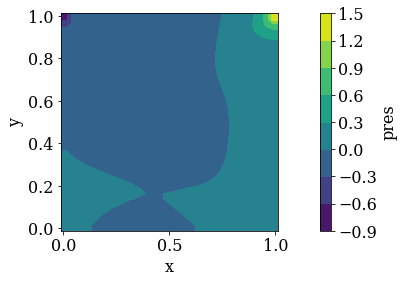

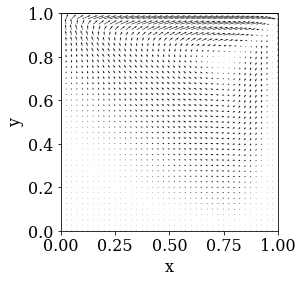

In [4]:
mae6225.io.plot_contour(gridc, 'pres')
mae6225.io.plot_vector(gridx,gridy,'velc')